# Simple two layer neural network
__Code implented has inspiration from:__
- <cite>http://cs231n.github.io/assignments2018/assignment1/</cite>

The following is a simple two layer fully connected neural network, implemented to work with our images. The purpose of this notebook is to create and test accuracy of a simple two layer Neural Network.

### Method
1. The images from the following three categories _potato_, _catfood (salmon)_ and _table_ is imported. 
    1. The images have the following distribution:<br/>
    <div class="alert alert-block alert-warning">
    <b>Without dataagumentation</b><br/> 
    __potato:__ $\qquad$ $\;$ $\;$ $\,$ 205 images<br/>
    __catfood(salmon):__ $\!$ 100 images<br/>
    __table:__ $\qquad$ $\;$ $\;$ $\;$ $\,$ 200 images<br/>
    </div>
    <div class="alert alert-block alert-warning">
    <b>With dataagumentation (4 rotations, 5 brightness)</b><br/> 
    __potato:__ $\qquad$ $\;$ $\;$ $\,$ 4100 images<br/>
    __catfood(salmon):__ $\!$ 2000 images<br/>
    __table:__ $\qquad$ $\;$ $\;$ $\;$ $\,$ 4000 images<br/>
    </div>
    2. These images loaded and shuffled into 3 matrices training -, validation - and test - images, with label vectors respective to the matrices, to train and validate the built network. Dataaugmented images is only loaded into the training matrice. The matrices and vectors have the following dimension:
    <div class="alert alert-block alert-warning">
    <b>Image matrices</b><br/> 
    $$\underset{ntr\times d}{\boldsymbol{X_{train}}} \qquad \underset{ntr\times 1}{\boldsymbol{y_{train}}} \qquad \qquad \underset{nv\times d}{\boldsymbol{X_{val}}} \qquad \underset{nv\times 1}{\boldsymbol{y_{val}}} \qquad \qquad \underset{nt\times d}{\boldsymbol{X_{test}}} \qquad \underset{nt\times 1}{\boldsymbol{y_{test}}} \qquad \qquad$$ <br/>
    
    $d$ = image dimensions ($\small224\cdot 224\cdot 3$)<br/>
    $ntr$ = number of training images ($\small50\%$ of total images + dataaugmented images)  <br/>
    $nv$ = number of validation images ($\small25\%$ of total images) <br/>
    $nt$ = number of test images ($\small25\%$ of total images) <br/>
    </div>
2. The images matrices is trained on the network with the following structure:
<div class="alert alert-block alert-warning">
    <b>Two layer neaural network structure</b><br/> 
    $$ \small \text{input} \rightarrow \text{fully connected layer} \rightarrow \text{ReLU} \rightarrow \text{fully connected layer} \rightarrow \text{softmax} $$
    </div>
3. Finding the best hyperparameters for the model
    1. Done by checking all combination of _learning rate_, _learning rate decay_, _regularization strengths_, _hidden layers_. The test hyperparameters have been chosen by tradeoff size of the neural network, and training time. The following hyperparameters have been testet:<br/>
    <div class="alert alert-block alert-warning">
    <b>Hyperparameters testing (best value = bold char)</b><br/> 
    learning rate: $\qquad \; \; \; \; \; \small[\boldsymbol{1e-1}, 1e-2]$ <br/>
    learning rate decay: $\; \; \; \; \; \small[\boldsymbol{0.95},1]$  <br/>
    regularization strengths: $\small[\boldsymbol{0.2}, 0.3]$ <br/>
    hidden layers: $\qquad \; \; \; \; \small[50, 250, \boldsymbol{500}]$ <br/>
    </div>

Dataagumentation have not been tested due to limitations of ram. In addition with the chosen regulization stregnth there are no indication of overfitting the network.  
All the above describe execpt dataaugmentation is shown below with testresults. 

## Imports

In [1]:
import os
import random
import numpy as np
import matplotlib.pylab as plt
from glob import glob
from neural_net import TwoLayerNet
from image_import import import_images
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Importing images

### Making training, validation and test data 

In [5]:
SOURCE_IMAGES_POT = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/kartofler/still' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/potato'
SOURCE_IMAGES_CAT = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/kat_laks/still' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/catfood'
SOURCE_IMAGES_TAB = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/baggrund/bevægelse' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/table

AUG_IMAGES_POT    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/potato'
AUG_IMAGES_CAT    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/catfood'
AUG_IMAGES_TAB    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/table'

images_pot        = glob(os.path.join(SOURCE_IMAGES_POT, "*.jpg"))
images_cat        = glob(os.path.join(SOURCE_IMAGES_CAT, "*.jpg"))
images_tab        = glob(os.path.join(SOURCE_IMAGES_TAB, "*.jpg"))

images_aug_pot    = glob(os.path.join(AUG_IMAGES_POT, "*.jpeg"))
images_aug_cat    = glob(os.path.join(AUG_IMAGES_CAT, "*.jpeg"))
images_aug_tab    = glob(os.path.join(AUG_IMAGES_TAB, "*.jpeg"))

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = import_images(images_pot, images_cat, images_tab)

## Training

### Train without dataaugmentation (with optimal parameters)

In [10]:
input_size = 224 * 224 * 3
hidden_size = 500
num_classes = 3
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=32,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.2, verbose=True, val_hist=True)

# Predict on the validation set

train_acc = (net.predict(X_train) == y_train).mean()
print('Train accuracy: ', train_acc)
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 1000: loss 1.249092
iteration 100 / 1000: loss 0.566594
iteration 200 / 1000: loss 0.521201
iteration 300 / 1000: loss 0.555495
iteration 400 / 1000: loss 0.551922
iteration 500 / 1000: loss 0.517363
iteration 600 / 1000: loss 0.609515
iteration 700 / 1000: loss 0.530574
iteration 800 / 1000: loss 0.525782
iteration 900 / 1000: loss 0.534070
('Train accuracy: ', 0.98536585365853657)
('Validation accuracy: ', 0.97999999999999998)
('Test accuracy: ', 0.93999999999999995)


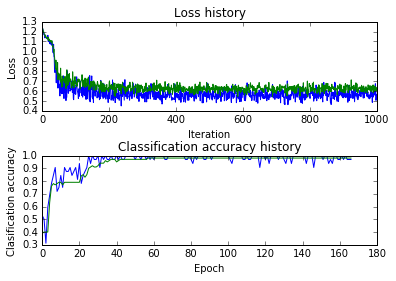

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'], label='train')
plt.plot(stats['val_loss_history'], label='val')
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [12]:
y_pred, score = net.predict(X_val, show_score=True)
print("Score: ", score[0:4])
print("Valdiation: ", y_val[0:4])
print("Prediction: ", y_pred[0:4])

('Score: ', array([[ 0.04822895,  0.04609564,  0.90567541],
       [ 0.08396023,  0.07976809,  0.83627168],
       [ 0.02452207,  0.02359829,  0.95187965],
       [ 0.08275679,  0.07863621,  0.838607  ]]))
('Valdiation: ', array([2, 2, 2, 2]))
('Prediction: ', array([2, 2, 2, 2]))


### Train with dataaugmentation (Does not work because of to high ram usage)

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = import_images(images_aug_pot, images_cat, images_tab, 
                                                               augmented=True, path_aug_potato=images_aug_pot[0:400], 
                                                               path_aug_catfood=images_aug_cat[0:400], 
                                                               path_aug_table=images_aug_tab[0:400])

In [ ]:
input_size = 224 * 224 * 3
hidden_size = 50
num_classes = 3
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=32,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.3, verbose=True)

# Predict on the validation set

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

### Hyperparameter optimization

In [23]:
best_net = None # store the best model into this 
best_stats = None # store best stats to plot
stats_list = []
best_val = -1
results = {}

# Network properties
input_size = 224 * 224 * 3
num_classes = 3

# Hyperparameters
learning_rate = [1e-1, 1e-2] 
learning_rate_decay = [0.95,1]
regularization_strengths =  [0.2, 0.3] 
hidden_layers = [50, 250, 500] 

for lr in learning_rate:
    for lrd in learning_rate_decay:
        for rs in regularization_strengths:
            for hl in hidden_layers:
                net = TwoLayerNet(input_size, hl, num_classes)

                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val, num_iters=600, batch_size=32, learning_rate=lr, learning_rate_decay=lrd, reg=rs, verbose=True)
                stats_list.append(stats)
                y_train_pred = net.predict(X_train)
                y_val_pred = net.predict(X_val)
                
                # Calculates accuraccy
                y_train_acc = np.mean(y_train == y_train_pred)
                y_pred_acc = np.mean(y_val == y_val_pred)
                results[(lr, lrd, rs, hl)] = (y_train_acc, y_pred_acc) # stores results in tuple
                # Stores the best results
                if y_pred_acc > best_val:
                    best_val = y_pred_acc
                    best_net = net
                    best_stats = stats

for lr, lrd, rs, hl in sorted(results):
    train_accuracy, val_accuracy = results[(lr, lrd, rs, hl)]
    print('lr %e lrd %e rs %e hl %e train accuracy: %f val accuracy: %f' % (
                lr, lrd, rs, hl, train_accuracy, val_accuracy))                    

iteration 0 / 600: loss 1.113664
iteration 100 / 600: loss 0.659702
iteration 200 / 600: loss 0.540778
iteration 300 / 600: loss 0.545573
iteration 400 / 600: loss 0.585173
iteration 500 / 600: loss 0.523478
iteration 0 / 600: loss 1.173907
iteration 100 / 600: loss 0.660236
iteration 200 / 600: loss 0.605340
iteration 300 / 600: loss 0.572513
iteration 400 / 600: loss 0.510596
iteration 500 / 600: loss 0.515122
iteration 0 / 600: loss 1.249151
iteration 100 / 600: loss 0.559746
iteration 200 / 600: loss 0.600180
iteration 300 / 600: loss 0.501178
iteration 400 / 600: loss 0.518295
iteration 500 / 600: loss 0.552435
iteration 0 / 600: loss 1.121197
iteration 100 / 600: loss 0.883369
iteration 200 / 600: loss 0.671456
iteration 300 / 600: loss 0.784420
iteration 400 / 600: loss 0.653811
iteration 500 / 600: loss 0.689502
iteration 0 / 600: loss 1.211511
iteration 100 / 600: loss 0.697406
iteration 200 / 600: loss 0.728916
iteration 300 / 600: loss 0.639075
iteration 400 / 600: loss 0.70

### Plot the best net

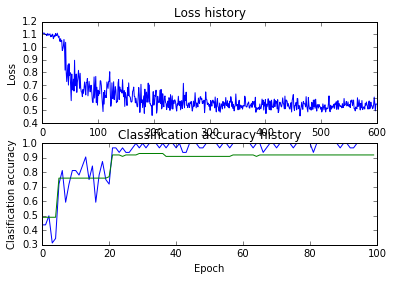

In [26]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

### Plot for all nets

In [ ]:
for s in stats_list:
    plt.subplot(2, 1, 1)
    plt.plot(s['loss_history'], label='train')
    #plt.plot(s['val_loss_history'], label='val')
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(s['train_acc_history'], label='train')
    plt.plot(s['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()

### Using model with saved parameters

### Conclusion

From the hyperparameter section it can be seen that several different parameter compositions gives same validation accuracy. For example the following parameters gives all the best results of $\small 92\%$ validation accuracy:

 <div class="alert alert-block alert-warning">
    1. Learning rate: $\scriptsize 1e-2$, $\;$ Learning rate decay: $\scriptsize 1.00$, $\;$ Regulization strength: $\scriptsize0.2$ $\;$ Hidden layer: $\scriptsize 500$ $\qquad$ Train accuracy: $\scriptsize 0.942 $ $\;$ Val accuracy: $\scriptsize 0.92 $ <br/>
    2. Learning rate: $\scriptsize 1e-1$, $\;$ Learning rate decay: $\scriptsize 0.95$, $\;$ Regulization strength: $\scriptsize0.2$ $\;$ Hidden layer: $\scriptsize 50$ $\,$ $\qquad$ Train accuracy: $\scriptsize 0.990 $ $\;$ Val accuracy: $\scriptsize 0.92 $ <br/>
    3. Learning rate: $\scriptsize 1e-1$, $\;$ Learning rate decay: $\scriptsize 0.95$, $\;$ Regulization strength: $\scriptsize0.2$ $\;$ Hidden layer: $\scriptsize 250$ $\qquad$ Train accuracy: $\scriptsize 1.000 $ $\;$ Val accuracy: $\scriptsize 0.92 $ <br/>
    4. Learning rate: $\scriptsize 1e-1$, $\;$ Learning rate decay: $\scriptsize 0.95$, $\;$ Regulization strength: $\scriptsize0.2$ $\;$ Hidden layer: $\scriptsize 500$ $\qquad$ Train accuracy: $\scriptsize 1.000 $ $\;$ Val accuracy: $\scriptsize 0.92 $ <br/>
    5. Learning rate: $\scriptsize 1e-1$, $\;$ Learning rate decay: $\scriptsize 0.95$, $\;$ Regulization strength: $\scriptsize0.3$ $\;$ Hidden layer: $\scriptsize 50$ $\,$ $\qquad$ Train accuracy: $\scriptsize 0.941 $ $\;$ Val accuracy: $\scriptsize 0.92 $ <br/>
    6. Learning rate: $\scriptsize 1e-1$, $\;$ Learning rate decay: $\scriptsize 1.00$, $\;$ Regulization strength: $\scriptsize0.2$ $\;$ Hidden layer: $\scriptsize 50$ $\,$ $\qquad$ Train accuracy: $\scriptsize 0.990 $ $\;$ Val accuracy: $\scriptsize 0.92 $ <br/>
    7. Learning rate: $\scriptsize 1e-1$, $\;$ Learning rate decay: $\scriptsize 1.00$, $\;$ Regulization strength: $\scriptsize0.3$ $\;$ Hidden layer: $\scriptsize 250$ $\qquad$ Train accuracy: $\scriptsize 0.990 $ $\;$ Val accuracy: $\scriptsize 0.92 $ <br/>
    </div>

From the above it can be concluded that the most stable and best hyperparameters to the build neural network are the following:
    <div class="alert alert-block alert-warning">
    <b>Best Hyperparameters</b><br/> 
    learning rate: $\qquad \; \; \; \; \; \small[1e-1]$ <br/>
    learning rate decay: $\; \; \; \; \; \small[0.95]$  <br/>
    regularization strengths: $\small[0.2]$ <br/>
    hidden layers: $\qquad \; \; \; \; \small[500]$ (chosen as it general gives a more stable detection of the network, because of the larger size in parameters. ) <br/> 
    </div>

    